In [15]:
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import random
import numpy as np
from utils import *
import re

In [16]:
def get_random_board():
    options = webdriver.ChromeOptions()
    options.add_argument('headless')
    driver = webdriver.Chrome(chrome_options=options)
    seed15 = ''.join([str(random.randint(0,9)) for _ in range(15)])
    driver.get(f"https://www.chiark.greenend.org.uk/~sgtatham/puzzles/js/lightup.html#7x7b20s4d0#{seed15}")
    elem = WebDriverWait(driver, 2000).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="permalink-desc"][@href]'))
    )

    # elem = driver.find_element_by_id("permalink-desc")
    board_desc = elem.get_attribute("href").split(":")[-1]

    arr = []
    for t in board_desc:
        if re.match(r"[a-z]", t):
            arr.extend((ord(t) - ord('a') + 1) * [WHITE])
        else:
            if t == 'B':
                arr.append(BLACK)
            else:
                arr.append(t)
    board = np.array(arr).reshape(7,7).astype(int)

    return board

<ipython-input-16-b0f36f06ff40>:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


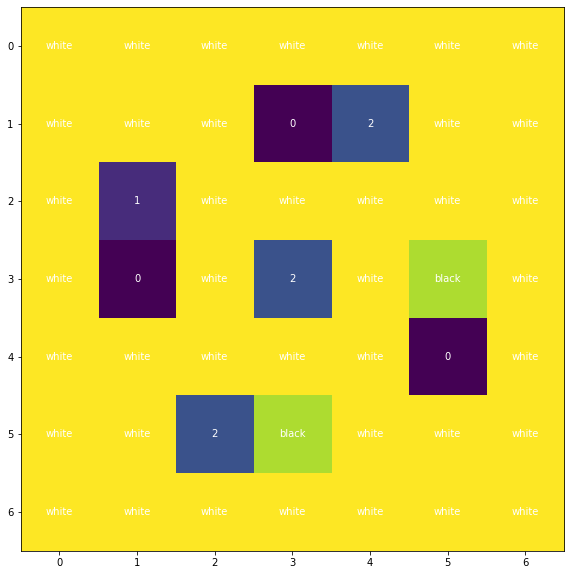

In [18]:
plot_board(get_random_board());